# Opencv approach 

In [1]:
#First we try opencv library 

# check opencv version
import cv2
# print version number
print(cv2.__version__)

4.4.0


In [2]:
!pwd

/Users/rabinandan/proj_models/face-dection-ml-mastery


In [3]:
!ls

Face-detection-tradition-and-deep-learning-approach.ipynb
face-detection-opvencv.py
haarcascade_frontalface_default.xml
test1.jpg


In [4]:
#load pre-trained model 
classifier = cv2.CascadeClassifier('/Users/rabinandan/proj_models/face-dection-ml-mastery/haarcascade_frontalface_default.xml')


In [5]:
#Once loaded, the model can be used to
#perform face detection on a photograph by calling the detectMultiScale() function.
# example of face detection with opencv cascade classifier
from cv2 import imread
from cv2 import CascadeClassifier
# load the photograph
pixels = cv2.imread('test1.jpg')
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
# print bounding box for each detected face
for box in bboxes:
    print(box)

[174  75 107 107]
[360 102 101 101]


In [6]:
# extract
x, y, width, height = box
x2, y2 = x + width, y + height
# draw a rectangle over the pixels
cv2.rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [231, 229, 229]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [231, 229, 229]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [231, 229, 229]],

       ...,

       [[ 68, 110, 153],
        [ 98, 136, 178],
        [103, 137, 180],
        ...,
        [100, 169, 238],
        [100, 169, 238],
        [ 98, 167, 236]],

       [[167, 171, 196],
        [157, 161, 186],
        [157, 161, 186],
        ...,
        [101, 170, 239],
        [101, 170, 239],
        [ 99, 168, 237]],

       [[139, 147, 170],
        [144, 150, 173],
        [139, 144, 169],
        ...,
        [ 98, 167, 237],
        [ 98, 167, 237],
        [ 97, 166, 235]]

In [7]:
cv2.imshow('face detection', pixels)
# keep the window open until we press a key
#cv2.waitKey(0)
# close the window
#destroyAllWindows()


In [8]:
#For more drails about cascase-face-detection
#pls have a look:
#https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

# Deep Learning apporach

Perhaps one of the more popular approaches is called the “Multi-Task Cascaded Convolutional Neural Network,”
or MTCNN for short, described by Kaipeng Zhang, et al. in the 2016
paper titled “Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks.”

The proposed CNNs consist of three stages. In the first stage,
it produces candidate windows quickly through a shallow CNN. Then, 
it refines the windows to reject a large number of non-faces windows
through a more complex CNN.
Finally, it uses a more powerful CNN to refine the result and output facial landmarks positions.
The MTCNN architecture is reasonably complex to implement. Thankfully, there are open source implementations of the architecture that can be trained on new datasets, as well as pre-trained models that can be used directly for face detection. Of note is the official release with the code and models used in the paper, with the implementation provided in the Caffe deep learning framework.

In [9]:
#The library can be installed via pip; for example:
!pip install mtcnn


In [10]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /Users/rabinandan/proj_models/python3-tf1.14/lib/python3.8/site-packages
Requires: keras, opencv-python
Required-by: 


In [11]:
# confirm mtcnn was installed correctly
!pip install tensorflow
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [12]:
model = mtcnn.MTCNN()

In [13]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

{'box': [186, 71, 87, 115], 'confidence': 0.9994562268257141, 'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}
{'box': [368, 75, 108, 138], 'confidence': 0.998593270778656, 'keypoints': {'left_eye': (392, 133), 'right_eye': (441, 140), 'nose': (407, 170), 'mouth_left': (388, 180), 'mouth_right': (438, 185)}}


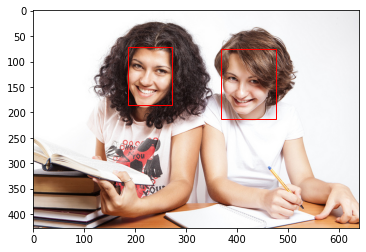

In [14]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

Source code has been obtined from #https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/